# Lab 06 - Plotting Weather Data

## Prelab

Before starting your Jupyter notebook, read through this entire document, then create a pseudocode outline of what your program will do.   Use separate the markdown sections that describe what each of sections of code will do. Describe what the plots will look like in the markdown blocks.

## Lab

Download the Excel data file titled ```govt_camp_2013_01_to_2016_03.xlsx]``` and save it to your preferred working directory. The directory where the Excel data file is placed needs to be the same directory you build the Jupyter notebook in.  The Excel file contains daily weather data points gathered from the USGS weather station in Government Camp, OR from Jan 1, 2009 to Mar 31, 2016.  The measurements and their units are given in the column headers (first row) of the spreadsheet. 

At the start of your lab, include a header in a Jupyter notebook markdown cell that contains the lab name, your name, the course, quarter and data. Below the header import the libraries you will use in the rest of the lab. Note that NumPy is imported as ```np```, Pandas is imported as ```pd``` and Matplotlib's pyplot library is imported as ```plt```. The three import aliases ```np```, ```pd```, and ```plt``` are commonly used in Python. The line ```%matplotlib inline``` is a Jupyter notebook command to cause Matplotlib plots to disply directly in a Jupyter notebook. If you are building a ```.py``` file instead of a Jupyter notebook ```.ipynb``` file, leave out ```%matplotlib inline``` as this line is not valid Python code. 

The Jupyter notebook code cell below shows the imports described above.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Next, use Panda's ```pd.read_csv()``` function to read the ```.xlsx``` data file into a Pandas _dataframe_ called ```df```. The Panda's method ```df.head()``` will show the first couple rows of the dataframe ```df```.

The code below saves the excel sheet to the variable ```df``` and show's the first couple rows of ```df```.

In [2]:
df = pd.read_excel('govt_camp_2013_01_to_2016_03.xlsx')
df.head()

,STATION,STATION_NAME,DATE,Precipitation (inches),Snow Depth (inches),Snowfall (inches),Max Temp (°F),Min Temp (°F)
0,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130101,0.00,44,0.0,29,12
1,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130102,0.01,42,0.0,27,11
2,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130103,0.00,42,0.0,20,12
3,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130104,0.16,41,0.0,31,14
4,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130105,0.00,41,0.0,37,28


The third column of the Pandas dataframe represents the date on which the observations in that row were recorded.  For example, the first row of data (index 0) contains a value of ```20130101``` in the ```DATE``` column.  The value ```20130101``` means January  01, 2013. 

Remove the first two columns of the dataframe ```df``` so that the resulting first column in the dataframe is the ```DATE``` column. You can use ```df.head()``` to view the dataframe after the two columns are removed.

The code below drops the ```STATION``` and ```STATION_NAME``` columns from dataframe ```df```.

In [3]:
df.drop(['STATION', 'STATION_NAME'], axis=1, inplace=True)

In the resulting dataframe, first column now represents the date on which the observations in that row were measured.  For example, row 48 of the dataframe contains a value of ```20130219```.  This means February 19, 2013.  Replace column 1 of the dataframe ```df``` (the ```DATE``` column) with 3 columns containing the ```year``` in the first column, the ```month``` in the second column, and the ```day``` of the month in the third column.  When you are finished, your dataframe ```df``` should be ```1186 x 8``` and it's first row should have the following values:

```text
2013    1     1    0.00    44    0.0    29    12 
```

The lines in the code cell below completes these operations. If you rerun the code cell, make sure to start at the beginning of the notebook.

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.insert(0, 'year', pd.DatetimeIndex(df['DATE']).year)
df.insert(1, 'month', pd.DatetimeIndex(df['DATE']).month)
df.insert(2, 'day', pd.DatetimeIndex(df['DATE']).day)
df.drop(['DATE'], axis=1, inplace=True)
print(df.shape)
df.head()

(1186, 8)


,year,month,day,Precipitation (inches),Snow Depth (inches),Snowfall (inches),Max Temp (°F),Min Temp (°F)
0,2013,1,1,0.00,44,0.0,29,12
1,2013,1,2,0.01,42,0.0,27,11
2,2013,1,3,0.00,42,0.0,20,12
3,2013,1,4,0.16,41,0.0,31,14
4,2013,1,5,0.00,41,0.0,37,28


The last step of data cleaning is to convert the resulting dataframe ```df``` into a NumPy array ```wd```. Once the data is in a NumPy array, you will be able to index and slice it using regular NumPy operations. Print the NumPy array with the command ```print(wd)``` and see how the year, month and day have been converted to floats. Don't forget what the columns 

The code cell below shows how to convert the dataframe ```df``` into a NumPy array called ```wd```. 

In [5]:
wd = np.array(df)
print(wd)

[[2.013e+03 1.000e+00 1.000e+00 ... 0.000e+00 2.900e+01 1.200e+01]
 [2.013e+03 1.000e+00 2.000e+00 ... 0.000e+00 2.700e+01 1.100e+01]
 [2.013e+03 1.000e+00 3.000e+00 ... 0.000e+00 2.000e+01 1.200e+01]
 ...
 [2.016e+03 3.000e+00 2.900e+01 ... 0.000e+00 3.300e+01 2.700e+01]
 [2.016e+03 3.000e+00 3.000e+01 ... 0.000e+00 4.700e+01 2.700e+01]
 [2.016e+03 3.000e+00 3.100e+01 ... 0.000e+00 5.900e+01 3.200e+01]]


### Create a line plot

Once the data is cleaned up, create a line plot with Matplotlib of precipitation in inches vs. time. Include an x-axis label, a y-axis label and a title on your plot.

![line plot](images/line_plot.png)

### Create a line plot with two lines

Create a Matplotlib line plot that shows the max and min temperatures in 2013 on two line. The max temp should be a red line and the min temp should be a blue time. Include a legend that shows ```Max Temp``` and ```Min Temp```. Include axis labels and a title on the plot.

The resulting plot should look something like the plot below:

![plot 2](images/plot2.png)

### Create 4 subplots

Once the data is cleaned up, create a Matplotlib figure containing four subplots that looks like Figure 3 in this document. The four subplots should be stacked on top of each other. Each subplot should contain the precipitation in one year. The first subplot shows precipitation in 2013, the second subplot shows precipitation in 2014, etc. Include a title on each subplot and a y-axis label on each subplot. On the bottom subplot (2016), include an x-axis label.

Use NumPy's ```np.where()``` function to save the precipitation data (number of inches only) exclusively for days in the year 2013 to a NumPy array called ```precip_2013```. Use the ```plt.subplots()``` method to plot the ```precip_2013``` data in the first subplot. 

Do the same for the precipitation data for 2014, then 2015, then 2016 and create a subplot for each. The plot for 2016 should include an x-axis label and have the same axis limits as the x-axis limits as the other subplots.

The resulting figure that contains four subplots, one subplot for each year, should look something like below: 

![Figure_1](images/plot3.png)

### y-y plot

Use NumPy's ```np.where()``` function to save some of the snow depth data into a NumPy array called ```winter13_14_sd```.  Remember what the column headers were in the Excel file.  Refer to that file, if need be, to see which column corresponds snow depth.  Remember, you deleted the date column and added 3 date columns in its place.  Your data set should only include the data from the first day of November 2013 to the last day of February 2014.  Indexing out data in this date range will probably be the most difficult part of the lab.

Do the same to select the same days' snow fallen data and save it into a NumPy array called ```winter13_14_sf```.  Use the ```plt.plotyy()``` function to plot both sets of data on the same graph, but with different y-axes.  

Notice the figure has a different vertical axis on the left compared to the vertical axis on the right.  Let Matplotlib choose your axis limits and line colors.  Be sure to include the grid lines, x-axis label, y-axis label, title, and legend as seen in the figure below.

![y-y plot](images/plot4.png)

In [17]:
#sf = wd[:, 5]
#sd = wd[:, 4]
#sf = 
np.where(wd[:,0]==2013 & wd[:,0]==2014)


TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

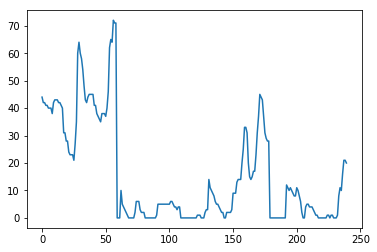

In [18]:
m = np.logical_and(np.logical_or(wd[:,0] == 2013, wd[:,0] == 2014),np.logical_or(wd[:,1]>10,wd[:,1]<3))
sf = wd[m,4]
plt.plot(sf)
#ax2 = ax1.twinx()
plt.show()

### Histogram

Create a histogram with Matplotlib that looks like this document's Figure 3.

Create a plot just like it from your ```winter13_14_sf``` NumPy array.  Match all of its labels etc.  20 bins were used to create this histogram.

![Histogram](images/plot5.png)

## Deliverables

Each student’s submission for the lab must be a single Jupyter Notebook. The Jupyter Notebook must contain markdown cells that explain the code, code cells that contain the code, and output cells that contain a total of 3 plots. The three plots produced by the code cells in the notebook should be: 

 * A line plot
 
 * A line plot with two lines and a legend
 
 * A figure that contains four sub-plots that shows precipitation verses time in four different years
 
 * A y-y plot that shows snow level on one y-axis and snow depth on the other y-axis
 
 * A histogram

Make sure to run all the cells in the Jupyter notebook before submitting the file. Upload your **_lab4.ipynb_** file to the Lab 4 drop box in D2L. 